In [7]:
import numpy as np
import pandas as pd
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier

from sklearn.linear_model import Perceptron

from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier


data_np = np.load("./ift3395-ift6390-reddit-comments/data_train.pkl", allow_pickle = True)

In [72]:
class NB():
    
    def __init__(self):
        self.voc = {}
        from nltk.corpus import stopwords
        self.stopwords = stopwords.words("english")
        from nltk.stem.porter import PorterStemmer
        self.stemmer = PorterStemmer()
        self.vocab_set = set()
        
    def fit(self, X,Y):
        # Creating a dictionary for the vocabulary
        voc = {}
        self.length_of_training_data = len(X)
        for data, label in zip(X, Y):
            words = self.preprocess(data)
            if label not in voc:
                voc[label] = {"num_of_words":0, "number_of_samples":0}
            voc[label]['number_of_samples'] += 1
            for word in words:
                self.vocab_set.add(word)
                if word in voc[label]:
                    voc[label][word] += 1
                    voc[label]["num_of_words"] += 1
                else:
                    voc[label][word] = 1
                    voc[label]["num_of_words"] += 1
        self.voc = voc
        
    def preprocess(self, sentence):
        # Removing stop words and adding stemming. 
        result = []
        pattern = re.compile(r'\b\w\w+\b')
        for word in re.findall(pattern, sentence):
            word = word.lower()
            if word not in self.stopwords:
                result.append(self.stemmer.stem(word))
        return result
        
    def predict(self, X, alpha = 0.25):
        y = []
        voc = self.voc
        classes = list(voc.keys())
        for value in X:
            words = self.preprocess(value)
            output_probs = np.zeros(len(voc.keys()))
            for i,label in enumerate(classes):
                prob = np.log(voc[label]['number_of_samples']/self.length_of_training_data) #prior probability
                denominator = voc[label]['num_of_words']+alpha*(len(self.vocab_set))
                for word in words:
                    if word not in voc[label]:
                        prob += np.log((0 + alpha)/denominator)
                    else:
                        prob += np.log((voc[label][word] + alpha)/denominator)
                output_probs[i] = prob
            y.append(classes[np.argmax(output_probs)])
        return y
    
    def accuracy(self, y_test, y_pred):
        return round(np.mean(np.array(y_test) == np.array(y_pred))*100, 2)

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_np[0], data_np[1], test_size=0.20)

In [73]:
%%time
cls = NB()
cls.fit(X_train, y_train)        

CPU times: user 37.4 s, sys: 285 ms, total: 37.6 s
Wall time: 38.9 s


In [74]:
%%time
y_pred = cls.predict(X_test, 0.25)

CPU times: user 20.4 s, sys: 208 ms, total: 20.6 s
Wall time: 22 s


In [75]:
%%time
cls.accuracy(y_test, y_pred)

CPU times: user 3.57 ms, sys: 905 µs, total: 4.47 ms
Wall time: 4.55 ms


55.74

In [180]:
data_test_np = np.load("./ift3395-ift6390-reddit-comments/data_test.pkl", allow_pickle = True)

In [61]:
len(preds)

30000

In [58]:
preds = cls.predict(data_test_np, 0.25)

In [182]:
len(predicted)

30000

In [184]:
predicted[0]

'baseball'

In [185]:
f = open("prediction_new.csv","w+")
f.write("Id,Category\n")
for d,s in enumerate(predicted):
    f.write("%d,%s\n" %(d,s))

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer


In [13]:
len(X_train)

56000

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(56000, 66044)

In [46]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
a = lb.fit_transform(y_train)

In [68]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb = lb.fit(y_train)
a = lb.transform(y_train)

In [22]:
y_train.shape, y_test.shape

((56000, 20), (14000, 20))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_np[0], data_np[1], test_size=0.20)

In [292]:


text_clf = Pipeline([
    ('vect', TfidfVectorizer(stop_words = "english",
                             sublinear_tf = True)),
     ('clf', xgb.XGBClassifier())])

text_clf2 = Pipeline([
    ('vect', CountVectorizer(stop_words = "english")),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3,
                          max_iter=5, tol=None))
])

p3 = Pipeline([['clf3', VotingClassifier(estimators=[("p1",text_clf), ("p2",text_clf2)])]])

# clf = BaggingClassifier(text_clf, n_estimators=50)

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)*100

44.15714285714286

In [223]:
y_df = pd.DataFrame(data_np[1])

In [235]:
funny = 

In [246]:
! pip install -U liwc

In [254]:
from util import *

In [257]:
nrc = nrc.parse_emolex()

In [273]:
extract(nrc,"My name is Akshay and I am very joke today")

{'negative': 0.1}

In [271]:
lex = liwc.parse_liwc("2015")

In [272]:
extract(lex,"this is happy a text")

{'function': 0.6,
 'article': 0.2,
 'adj': 0.2,
 'affect': 0.2,
 'posemo': 0.2,
 'auxverb': 0.2,
 'verb': 0.2,
 'focuspresent': 0.2,
 'pronoun': 0.2,
 'ipron': 0.2}

In [1]:
# import re
# from collections import Counter

# def tokenize(text):
#     # you may want to use a smarter tokenizer
#     for match in re.finditer(r'\w+', text, re.UNICODE):
#         yield match.group(0)

# import liwc
# parse, category_names = liwc.load_token_parser('./LIWC/LIWC2015_English.dic')

In [274]:
for i in y_df[y_df[0]=="funny"].index.tolist():
    print(extract(nrc,data_np[0][i]))
    print("*"*10)

{'anger': 0.022222222222222223, 'joy': 0.044444444444444446, 'positive': 0.044444444444444446, 'surprise': 0.044444444444444446, 'anticipation': 0.022222222222222223}
**********
{'negative': 0.09090909090909091}
**********
{'positive': 0.1, 'trust': 0.1, 'negative': 0.1, 'sadness': 0.1}
**********
{'anticipation': 0.05}
**********
{'negative': 0.08333333333333333}
**********
{'negative': 0.08450704225352113, 'sadness': 0.07042253521126761, 'joy': 0.014084507042253521, 'positive': 0.014084507042253521, 'anger': 0.028169014084507043, 'disgust': 0.028169014084507043, 'fear': 0.056338028169014086, 'anticipation': 0.014084507042253521}
**********
{'positive': 0.13636363636363635, 'anger': 0.09090909090909091, 'disgust': 0.09090909090909091, 'fear': 0.09090909090909091, 'negative': 0.045454545454545456, 'sadness': 0.09090909090909091, 'joy': 0.045454545454545456, 'trust': 0.045454545454545456}
**********
{'joy': 0.047619047619047616, 'positive': 0.047619047619047616, 'trust': 0.0952380952380

In [201]:
y_test = lbl.inverse_transform(y_test)

In [210]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

a = confusion_matrix(y_test, b, labels = classes)

In [219]:
print(classification_report(y_test, b, target_names=classes))

                 precision    recall  f1-score   support

      AskReddit       0.26      0.29      0.27       735
GlobalOffensive       0.70      0.62      0.66       706
          Music       0.62      0.68      0.65       682
      Overwatch       0.59      0.73      0.65       668
          anime       0.63      0.65      0.64       699
       baseball       0.75      0.62      0.68       682
         canada       0.41      0.52      0.46       692
     conspiracy       0.38      0.51      0.44       685
         europe       0.58      0.49      0.53       737
          funny       0.26      0.17      0.21       721
  gameofthrones       0.74      0.73      0.73       708
         hockey       0.72      0.62      0.67       727
leagueoflegends       0.78      0.66      0.71       717
         movies       0.54      0.61      0.57       688
            nba       0.68      0.64      0.66       678
            nfl       0.63      0.63      0.63       691
         soccer       0.72    

In [209]:
df_cm

,AskReddit,GlobalOffensive,Music,Overwatch,anime,baseball,canada,conspiracy,europe,funny,gameofthrones,hockey,leagueoflegends,movies,nba,nfl,soccer,trees,worldnews,wow
AskReddit,210,8,34,17,26,10,60,44,17,58,18,9,7,59,7,11,5,64,47,24
GlobalOffensive,16,441,11,55,9,8,10,16,8,14,7,3,34,9,10,7,17,11,5,15
Music,31,7,467,5,11,6,19,24,3,17,5,7,5,19,6,9,3,22,9,7
Overwatch,9,23,8,486,22,1,9,20,4,14,2,2,19,10,3,5,4,10,3,14
anime,23,5,21,18,452,7,14,18,8,18,14,2,4,39,7,5,2,22,12,8
baseball,18,7,11,16,7,423,10,15,2,16,5,25,5,9,31,39,13,14,10,6
canada,42,5,8,5,4,1,362,58,47,27,5,4,0,6,5,3,6,19,76,9
conspiracy,38,7,7,9,8,3,59,347,29,22,9,2,4,17,9,5,6,20,77,7
europe,26,6,9,7,13,3,76,51,358,18,7,4,3,16,0,5,10,16,99,10
funny,146,18,22,19,24,15,50,33,11,123,30,8,6,50,18,16,12,65,36,19


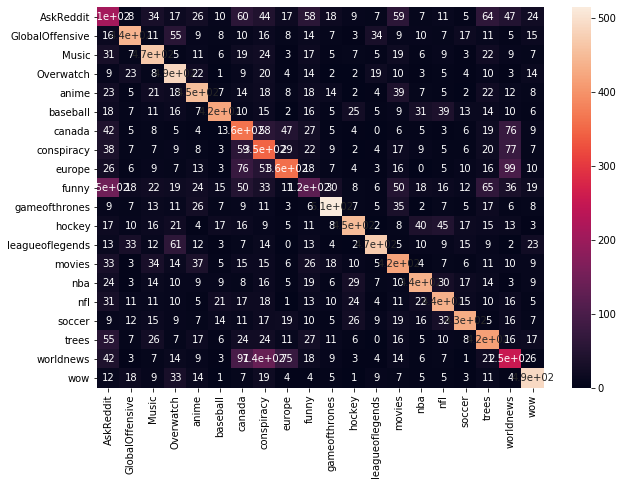

In [207]:
df_cm = pd.DataFrame(a, index=[i for i in classes], columns = [i for i in classes])

plt.figure(figsize = (10,7))
import seaborn as sn
sn.heatmap(df_cm, annot=True)

In [164]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))



In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

french_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([french_stemmer.stem(w) for w in analyzer(doc)])

vectorizer_s = TfidfVectorizer(analyzer="word", stop_words='english', sublinear_tf = True, strip_accents='ascii')

In [9]:

# tfidf = TfidfVectorizer(stop_words = "english",sublinear_tf = True, strip_accents='ascii')
vectorizer_s.fit(X_train+X_test)

X_train_1 = vectorizer_s.transform(X_train)
X_test_1 = vectorizer_s.transform(X_test)




In [10]:
X_train_1.shape

(56000, 73682)

In [13]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

text_clf = MultinomialNB(alpha=0.25)
text_clf = SVC(C=0.20)


text_clf.fit(X_train_1, y_train)
predicted = text_clf.predict(X_test_1)
np.mean(predicted == y_test)*100

/Users/akshayrana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [301]:
X_train_1.shape

(56000, 65658)

In [341]:
a= "akshay"
b = "my name is akshay"
a in b

True

In [335]:
a = "My name is Akshay"
len(a.split(" "))

4

In [325]:
df = pd.DataFrame({"posts":data_np[0], "label":data_np[1]})

In [329]:
classes = df["label"].unique().tolist()

In [337]:
df["word_count"] = df['posts'].apply(lambda x: len(x.split(" ")))

In [342]:
df['isWebsite'] = df["posts"].apply(lambda x: 1 if "http" in str(x) else 0)

In [348]:
df[df['label']=="funny"].shape

(3500, 4)

In [368]:
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

df[df['label']=="worldnews"]

,posts,label,word_count,isWebsite
29,Maybe he's been listening in on their telephone conversations?\n\nJust a thought.,worldnews,11,0
34,I just wonder how much the power bill would be if we cut all the bad emission producing energy we use to power what we're doing right now. I'd imagine it will be a lot higher.,worldnews,36,0
91,"The simplest explanation is that Russia controls aspects of the DOJ and FBI, yes. Not all of it entirely. Often times it only takes 2-3 people being compromised to pull of shit like this. The CIA infiltrates the intelligence services in other countries so it makes sense Russia can do it to us. The Russians successfully infiltrated our treasury department with dozens of spies. It's not unreasonable to think it happened again.\n\n\n\nBritain just admitted that this routinely happens on their soil. Why would America be afraid to admit it?",worldnews,89,0
114,I have an acquaintance who went with her fiancé (both American). He's a rich white idiot who has bought full in to the 'DPRK is a communist paradise and the media just won't show you that to keep you trapped in your capitalist prison!' conspiracy. \n\nHe got into a fight about it with the rest of us at a mutual friend's wedding. It was definitely a first for me.,worldnews,69,0
149,"&gt; bringing all these narratives together to tease out what they might all have in common.\n\nutopia :)\n\npragmatic self keeps reminding me that as long as we live in a reality with limited resources, people will form groups to compete for them. it seems that common threats are the most efficient antidote.",worldnews,52,0
153,"Lol, this is news now, huh? Anything with Trump in the title I guess. ""Trump Drops Cheeto""",worldnews,17,0
159,Sweden's precious data will NEVER be safe from Angela Merkel's spies as long as Sweden remains in the EU.\n\nThe solution is clear: exit the EU and forge a security alliance with Russia. President Putin will safeguard your data from prying eyes.,worldnews,43,0
172,&gt;you'll get downvoted\n\nHe says at +389\n\nI realize people like to pretend reddit has some sort of homogeneous attitude but funny enough it doesn't work that way.,worldnews,26,0
192,"Then you'll be pleased to know that you don't actually understand what chemical castration is.\n\nIt doesn't remove the genitalia at all. It's a hormone treatment (basically birth control pills given to men) which greatly reduce if not eliminate the sex drive.\n\nThe person may still have genitals, hands, mouth, and words that can be used to harm, but no longer any desire to do so.",worldnews,65,0
205,"I would give it a shot. Although I already firmly believed in evolution, reading the greatest show on earth fostered a deeper understanding of how beautiful evolution is and allowed me to completely answer why I do anything that I eber do",worldnews,42,0


In [386]:
from bs4 import BeautifulSoup
tmp = BeautifulSoup(df.loc[2, "posts"])  


In [391]:
tmp

<html><body><p>https://youtu.be/6xxbBR8iSZ0?t=40m49s

If you didn't find it already.

Nothing out of the ordinary though, she just has eye constant eye contact.</p></body></html>

In [388]:
tmp.get_text()

"https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf you didn't find it already.\n\nNothing out of the ordinary though, she just has eye constant eye contact."

In [378]:
df[df['isWebsite']==1]

,posts,label,word_count,isWebsite
2,"https://youtu.be/6xxbBR8iSZ0?t=40m49s\n\nIf you didn't find it already.\n\nNothing out of the ordinary though, she just has eye constant eye contact.",leagueoflegends,18,1
36,kudi is the shit. two videos:\n\n1) [Crookers remix of Day 'N Night](http://www.youtube.com/watch?v=WSWrepLjTKc)\ni actually heard this before i heard the album version.\n\n2) [Kid Cudi - Marijuana Music Video](http://www.youtube.com/watch?v=lBEJc9G6KTM)\nthis video was directed by shia labeouf apparently.\n\n-edit-\nformatting.,trees,34,1
46,"/u/perpetualhorrors, your post has been removed as this artist is in our [updated Hall of Fame](https://www.reddit.com/r/music/wiki/halloffame).\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Music) if you have any questions or concerns.*",Music,39,1
48,"I honestly couldn't find an overall source where it showed all toi for the whole tournament but I did find individual games on the IIHF site [here](http://m.worldjunior2017.com/en/games/2017-01-05/USA-vs-CAN/#statistics-tab), and he had the 4th most minutes among forwards in both the semifinals and the finals, at least - I figured that was enough to confirm what I remembered.",hockey,57,1
79,I tried to tell you all before but I got down-voted to oblivion\nhttps://www.reddit.com/r/soccer/comments/50vln6/christian_pulisic_2nd_goal_vs_st_vincent_60/d77au8d/,soccer,13,1
87,"That art looks like it's from Tiv who did [Masamune kun no Revenge](https://myanimelist.net/manga/46716/Masamune-kun_no_Revenge), so I'm sold on art alone.",anime,19,1
117,What does [Rushden &amp; Diamonds](https://en.wikipedia.org/wiki/AFC_Rushden_%26_Diamonds) have to do with Ronaldo's earnings? :p,soccer,12,1
119,someone wrote an article detailing the fictitious backstories of everyone in that GIF and it might be the best thing I've ever read.\n\nEdit: [HERE IT IS](https://www.progressiveboink.com/2012/5/31/2995814/yankeesfans-gif-animated-yankee-enthusiasts-story),baseball,26,1
164,"&gt; Ever heard of the burden of proof?\n\nYou have it too, given your claim that immigration improves GDP. The neutral claim in this case would be that immigration doesn't affect GDP growth.\n\n&gt;Why do you keep repeating this nonsense?\n\nBecause it isn't. Learn some economics. Asia went from being just Australia and New Zealand's fledgling economies to a powerful economic region on par with Europe. It would be absolutely retarded to not want to tap into it. To do so you need to be able to trade in that Ocean, and Vancouver is the best town to do so.\n\n&gt;From where in Canada was the vast majority of the population of the city going to come from?\n\nWell, let's see... anywhere where they felt the advantages of moving to a large growing town outweighed staying where they are. Internal migration does occur, it's not like people literally never move once their family lives in an area.\n\n&gt;Do you have evidence that large percentage of the population of the city is directly involved in primary or even secondary import and export activities?\n\nhttp://www2.gov.bc.ca/gov/content/data/statistics/employment-labour/labour-market-statistics\n\n&gt;Does it seem odd to you that every other major port on the north American Pacific coast has a massive immigrant population?\n\nSuch towns do, because they're easily accessible and have a large number of low skill and high paying jobs for them to work because of the shipping yards, so there's incentive to stay there or move there once they arrive. Yeah, that pre-existing business sure does draw in people...\n\n&gt;Assertion isn't a substitute for good reasoning.\n\nTrue, which is why I've linked evidence and posted conclusions that can be drawn from the evidence.\n\n&gt;Why stop at Vancouver? Why allow any immigration after confederation?\n\nI never said all immigration was bad, just excessive immigration. The dose makes the poison, don't you know. We n

In [373]:
y = ""
df[df['label']==y]['word_count'].sum()/df[df['label']==y].shape[0]

/Users/akshayrana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


nan

In [309]:

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data_np[0], data_np[1], test_size=0.20)

# tfidf = TfidfVectorizer(stop_words = "english",sublinear_tf = True, strip_accents='ascii')
# tfidf.fit(X_train)

# X_train_1 = tfidf.transform(X_train)
# X_test_1 = tfidf.transform(X_test)


text_clf1 = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=0.001,
                          max_iter=10, tol=None)
# text_clf.fit(X_train_1, y_train)
# predicted = text_clf.predict(X_test_1)
# np.mean(predicted == y_test)*100

In [313]:
from sklearn.ensemble import VotingClassifier

clf = VotingClassifier(estimators=[('clf1',MultinomialNB(alpha=0.25)), ('clf3',LogisticRegression())])
clf.fit(X_train_1, y_train)

/Users/akshayrana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akshayrana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('clf1',
                              MultinomialNB(alpha=0.25, class_prior=None,
                                            fit_prior=True)),
                             ('clf3',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0,
                                                 warm_start=False))],
                 flatten_transform=True, n_jobs=None, voting='har

In [314]:
predicted = text_clf.predict(X_test_1)
np.mean(predicted == y_test)*100

42.99285714285715

In [307]:

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data_np[0], data_np[1], test_size=0.20)

tfidf = TfidfVectorizer(stop_words = "english",sublinear_tf = True, strip_accents='ascii')
tfidf.fit(X_train)

X_train_1 = tfidf.transform(X_train)
X_test_1 = tfidf.transform(X_test)


text_clf = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=0.001,
                          max_iter=100, tol=None)
text_clf.fit(X_train_1, y_train)
predicted = text_clf.predict(X_test_1)
np.mean(predicted == y_test)*100

54.300000000000004

In [188]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
lbl.fit(y_train)
y_train = lbl.transform(y_train)
y_test = lbl.transform(y_test)

In [110]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [190]:
classes = lbl.classes_.tolist()

In [191]:
classes

['AskReddit',
 'GlobalOffensive',
 'Music',
 'Overwatch',
 'anime',
 'baseball',
 'canada',
 'conspiracy',
 'europe',
 'funny',
 'gameofthrones',
 'hockey',
 'leagueoflegends',
 'movies',
 'nba',
 'nfl',
 'soccer',
 'trees',
 'worldnews',
 'wow']

In [89]:
predicted = text_clf.predict(X_test)

In [199]:
b = lbl.inverse_transform(predicted)

In [91]:
b

array(['AskReddit', 'AskReddit', 'AskReddit', ..., 'AskReddit',
       'AskReddit', 'AskReddit'], dtype='<U15')

In [92]:

from sklearn.metrics import accuracy_score
accuracy_score(predicted, y_test)*100

4.978571428571429

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
new_X = CountVectorizer(stop_words="english", max_features=1000).fit_transform(X_train)
# X_train

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cust_s = '38311    & 36474     & 35823                       & 36437                 & 35783                                 & 36882                   & 36837                             & 36882                                   & 36245'

num_par_default = [72268, 74249, 69835, 74244, 69832, 67526, 67521, 67526, 63127]
num_par_custom = s

x_labels = ['Unprocessed', 
            'Processed', 
            'No Punctuation', 
            'No Links', 
            'No Links \n& No Punctuation',
            'Processed \n& Lemmatized', 
            'Processed, No Links \n& Lemmatized', 
            'Processed, \nNo Punctuation & Lemmatized', 
            'Processed, No Links, \nNo Punctuation & Lemmatized']

fig = plt.figure()
plt.title("Number of Parameters After Vectorization")
plt.xlabel("Feature Set")
plt.xticks(rotation = 'vertical')
plt.ylabel("Number of Parameters")
plt.bar(x_labels, num_par_default)
plt.bar(x_labels, num_par_custom)
plt.legend(['Default Vectorizer', 'Custom Vectorizer'])
plt.gcf().subplots_adjust(bottom=0.5)
plt.show()
fig.savefig('num_param.png')

NameError: name 's' is not defined